In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def thresh(image):
    limit = 45
    _, thresh = cv2.threshold(image,np.amax(image)-limit, 255, cv2.THRESH_BINARY_INV)       # threshold

    #otsu, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)       # threshold v2
    return thresh

In [3]:
def erode(image):
    kernel = np.ones((4,4), np.uint8)       # kernel size
    erosion = cv2.erode(image, kernel, iterations=1)        # apply erosion
    return erosion

In [4]:
def max_objects(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))        # kernel size
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)           # apply opening
    contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)     # get contours

    areas =[]
    for i, contour in enumerate(contours):    # get areas   
        area = cv2.contourArea(contour)
        areas.append(area)

    mask = np.zeros_like(opening)           # create mask
    for i, contour in enumerate(contours):  # draw contours
        area = cv2.contourArea(contour)
        if area > np.amax(areas)/2:
            cv2.drawContours(mask, [contour], -1, 255, -1)

    result = cv2.bitwise_and(image, image, mask=mask)       # apply mask
    return result

In [5]:
def fill_empty(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30,30))  # kernel size
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)      # apply closing
    return closing

In [6]:
def borderfilter(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)      # convert to gray
    y,x = gray.shape                                    # get image size
    new_image = gray[40:y-40, 40:x-40]                  # remove border
    return new_image

In [7]:
def apply_mask(image,final_mask):
    new_shape = (image.shape[1], image.shape[0])                # get original image size
    final_mask = cv2.resize(final_mask, new_shape, interpolation = cv2.INTER_LINEAR)    # resize mask to original image size
    apply = cv2.bitwise_and(image, image, mask=final_mask)      # apply mask
    return apply

In [8]:
def img_show(img, mask, final_mask, apply_mask,name):
    # show image original, threshold, final_mask, apply_mask
    fig = plt.figure(figsize=(30, 5))
    fig.suptitle(name)
    
    fig.add_subplot(1,4,1)
    plt.imshow(img,cmap='gray')
    plt.title('original')

    fig.add_subplot(1,4,2)
    plt.imshow(mask, cmap='gray')
    plt.title('threshold')

    fig.add_subplot(1,4,3)
    plt.imshow(final_mask, cmap='gray')
    plt.title('final_mask')

    fig.add_subplot(1,4,4)
    plt.imshow(apply_mask, cmap='gray')
    plt.title('apply_mask')

    plt.show()
    plt.close(fig)

In [9]:
def names(cont):    
    folder = "D:/SkinCancerDatasets/ISIC/images_separate_type/melanoma/"    # folder path
    files_names = os.listdir(folder)        # get all files names
    name = folder + files_names[cont]       # get image name
    short_name = files_names[cont]          # get image short name
    return name, short_name

ISIC_0000022.jpg


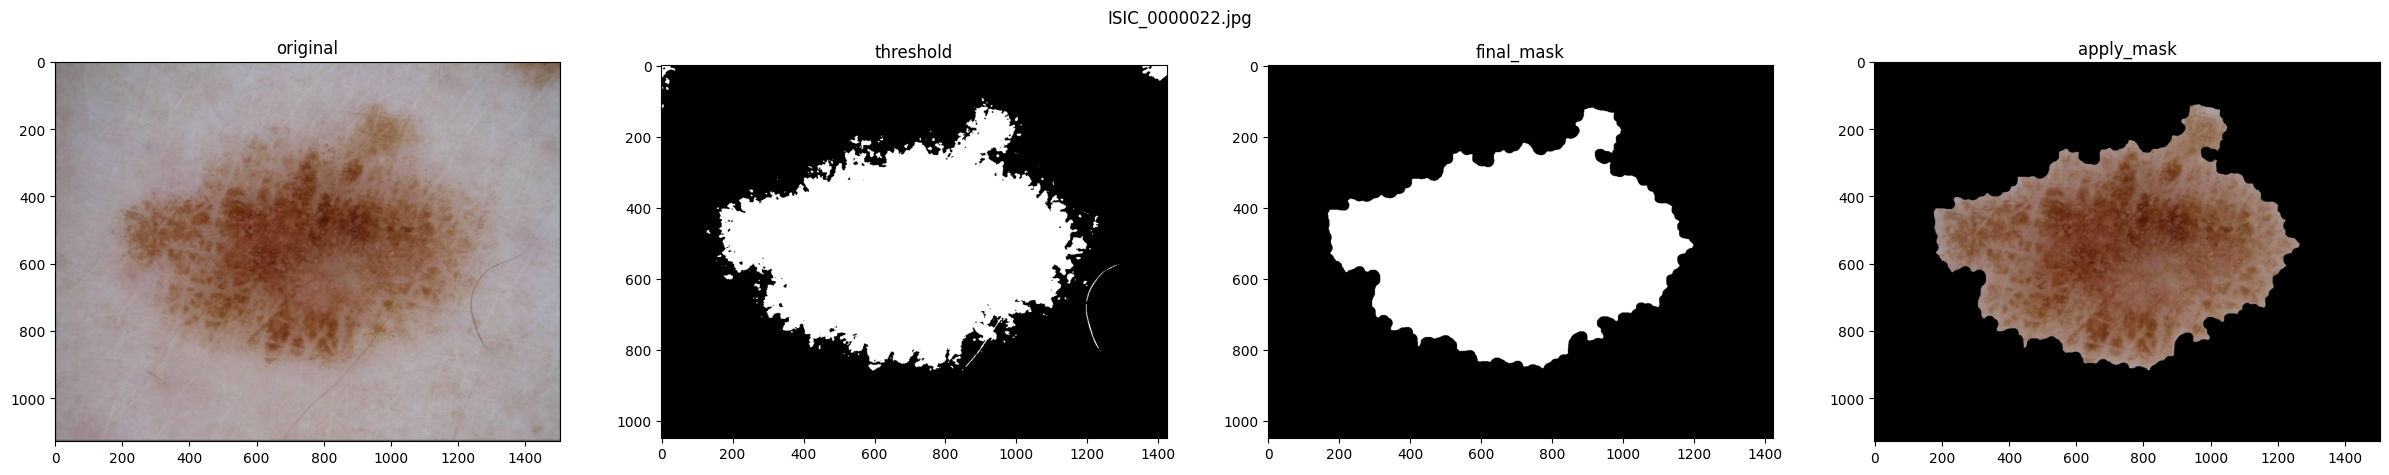

In [13]:
name, short_name = names(3)                  # get image name

bad_images_file = open('../../csv_files/bad_images.csv', 'r')    # open csv file
bad_images = bad_images_file.read().splitlines()                # get bad images names
bad_images_file.close()                                         # close csv file

if short_name not in bad_images:                                    # check if image is in bad images
    print(short_name)

    image = cv2.imread(name)                        # read image
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    # convert to RGB
    filter = borderfilter(image)                    # remove border
    blur = cv2.medianBlur(filter,3)                 # apply median filter
    mask = thresh(blur)                             # apply threshold
    erosion = erode(mask)                           # apply erosion
    result = max_objects(erosion)                   # apply max objects
    final_mask = fill_empty(result)                 # fill empty spaces
    apply = apply_mask(img,final_mask)              # apply mask

img_show(img, mask, final_mask, apply, short_name)